In [12]:
import torchvision
import tokenizers

import itertools
import matplotlib.pyplot as plt

from tqdm import tqdm
import torchtext

In [6]:
flickr_src= '../Datasets/Flickr30k/'

In [7]:
with open(flickr_src + 'results_20130124.token', 'r') as f:
    text = f.read()

In [8]:
dataset = torchvision.datasets.Flickr30k(flickr_src + 'flickr30k-images', flickr_src + 'results_20130124.token')

# max_length setting
max_len = 150
vocab_size = 30000

In [9]:
tokenizer = tokenizers.BertWordPieceTokenizer(
    clean_text = True,
    lowercase = False
)

list_of_strings = list(itertools.chain.from_iterable(list(dataset.annotations.values())))
lens = [len(x) for x in list_of_strings]
max_len = max(lens) 
max_len

# trainer = tokenizers.trainers.UnigramTrainer(
#     vocab_size = 
# )

# tokenizer.train(
    
# )

toks = [x.split() for x in list_of_strings]
mainset = set()
for x in tqdm(toks):
    mainset = mainset.union(set(x))

100%|██████████| 158915/158915 [01:02<00:00, 2534.10it/s]


(array([1.7470e+03, 4.0150e+04, 5.7715e+04, 3.3704e+04, 1.4617e+04,
        6.1280e+03, 2.6340e+03, 1.1340e+03, 5.4300e+02, 2.6000e+02,
        1.2600e+02, 7.1000e+01, 3.3000e+01, 2.2000e+01, 1.4000e+01,
        9.0000e+00, 3.0000e+00, 2.0000e+00, 2.0000e+00, 1.0000e+00]),
 array([  7.  ,  26.95,  46.9 ,  66.85,  86.8 , 106.75, 126.7 , 146.65,
        166.6 , 186.55, 206.5 , 226.45, 246.4 , 266.35, 286.3 , 306.25,
        326.2 , 346.15, 366.1 , 386.05, 406.  ]),
 <BarContainer object of 20 artists>)

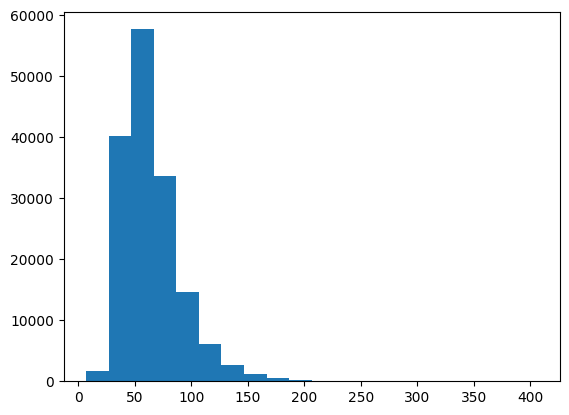

In [10]:
plt.hist(lens, bins = 20)

In [ ]:
tokenizer = tokenizers.BertWordPieceTokenizer(
    clean_text = True,
    lowercase = False
)

list_of_strings = list(itertools.chain.from_iterable(list(dataset.annotations.values())))
lens = [len(x) for x in list_of_strings]
max_len = max(lens) 

tokenizer.train_from_iterator(list_of_strings,
                              vocab_size = vocab_size,
                              show_progress = True,
                              special_tokens = ['[PAD]', '[UNK]', '[MASK]'])

tokenizer.save('Vocabulary/flickr30k.vocab')

In [41]:
vocab.

TypeError: 'torchtext._torchtext.Vocab' object is not callable

In [52]:
tokenizer = torchtext.data.utils.get_tokenizer('basic_english', language = 'en')

all_toks = [tokenizer(y) for y in list_of_strings]
    

vocab = torchtext.vocab.build_vocab_from_iterator(
    all_toks,
    min_freq = 2,
    specials = ['[PAD]', '[UNK]', '[MASK]'],
    special_first=False,
    max_tokens = vocab_size
)

vocab.set_default_index = -1

sentence = dataset[1][1][0]
print(sentence)
tok_sen = tokenizer(sentence)
print(tok_sen)
vocab.forward(tok_sen)
# 'Vocabulary/flickr30k.vocab'

Several men in hard hats are operating a giant pulley system .
['several', 'men', 'in', 'hard', 'hats', 'are', 'operating', 'a', 'giant', 'pulley', 'system', '.']


[118, 29, 2, 329, 273, 13, 1317, 0, 812, 3941, 2677, 1]

In [55]:
vocab['[PAD]']

12483

In [62]:
vocab.vocab

In [63]:
torchtext.data.Field

AttributeError: module 'torchtext.data' has no attribute 'Field'

In [57]:
torchtext.transforms.BERTTokenizer()

TypeError: stat: path should be string, bytes, os.PathLike or integer, not Vocab